# Лабораторна робота № 1.1

Проводимо підготовку та аналіз датасету до візуалізації даних.

In [70]:
#Під'єднуємо бібліотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Завантаження датасету
data = pd.read_csv("C:\\AI\\spotify-2023.csv", encoding = 'latin-1')

#Виводимо перші 5 рядків
print(data.head())

                            track_name    artist(s)_name  artist_count   
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2  \
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists   
0           2023               7            14                   553  \
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode   
0                147  141381703               

In [24]:
#Виводимо усі пропуски у стовпцях
missing_points = data.isnull().sum()
print("Загальна кількість пропусків у кожному стовпці:")
print(missing_points)

#Визначаємо розмір даних (кількість стовпців та рядків)
num_rows, num_colomns = data.shape
print("Розмір датасету: {} рядків і {} стовпців" .format(num_rows, num_colomns))

Загальна кількість пропусків у кожному стовпці:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64
Розмір датасету: 953 рядків і 24 стовпців


In [25]:
#Визначаємо типи даних
data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

# Завдання № 1

Побудувати горизонтальну стовпчикову діаграму, на якій відображаються 10
найпопулярніших пісень на Spotify у 2023 році за кількістю
прослуховувань.
Побудувати кругову діаграму для тих самих даних.

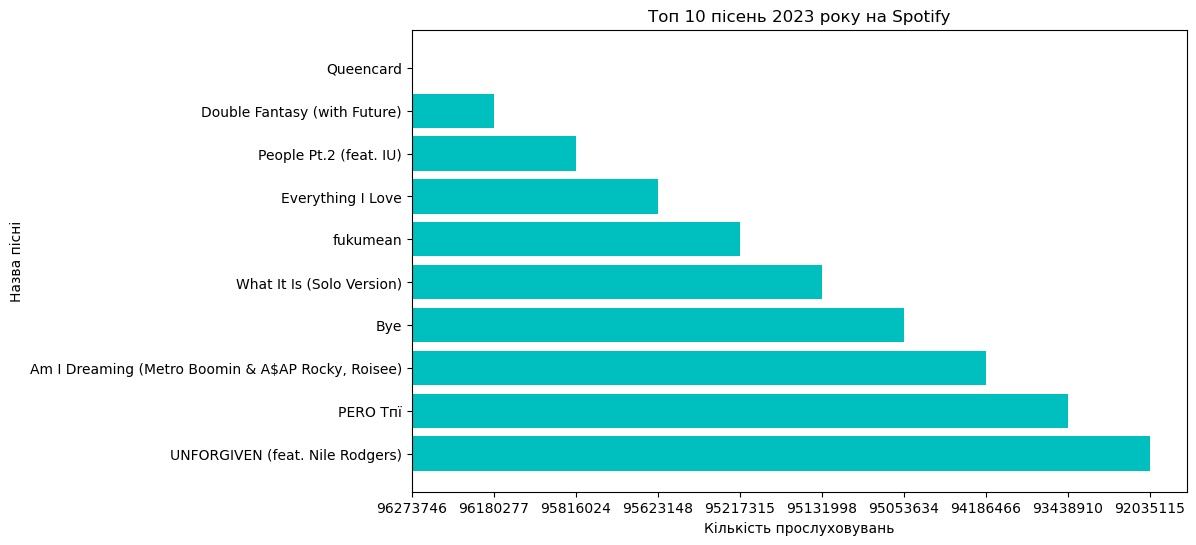

In [42]:
#Виділемо пісні 2023 року
songs_2023 = data[data["released_year"] == 2023]

#Відсортовуємо топ 10 пісень 2023 року за кількістю прослуховувань
top_10_songs = songs_2023.sort_values(by="streams",ascending=False).head(10)

#Будуємо діаграму
plt.figure(figsize=(10, 6))
plt.barh(top_10_songs["track_name"], top_10_songs["streams"], color='c')
plt.xlabel("Кількість прослуховувань")
plt.ylabel("Назва пісні")
plt.title("Топ 10 пісень 2023 року на Spotify")
plt.gca().invert_yaxis()
plt.show()

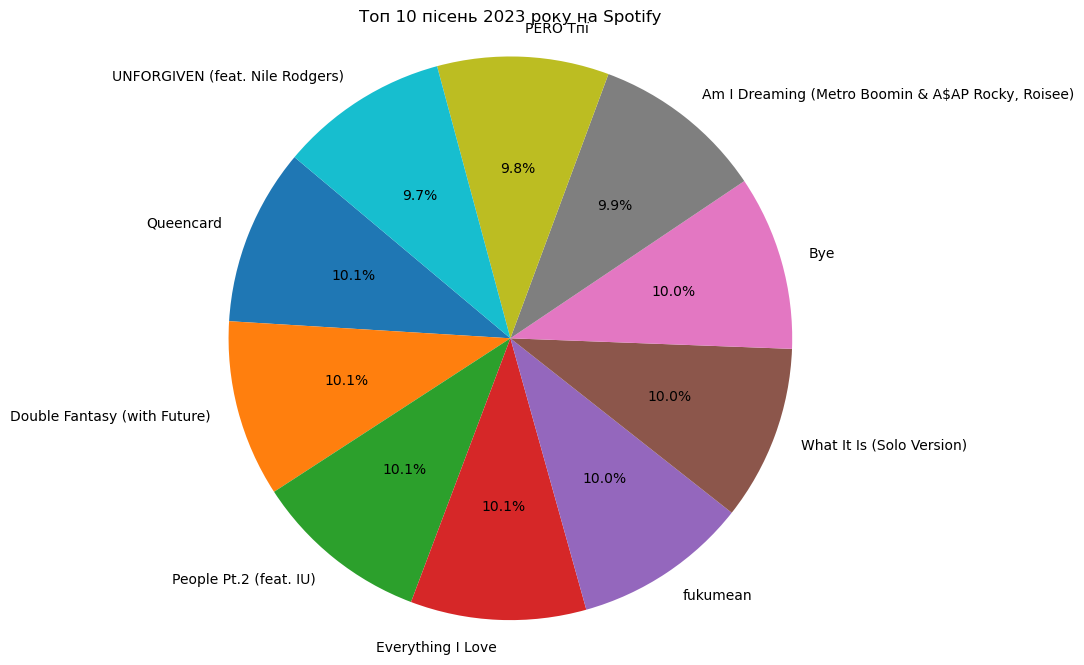

In [48]:
#
plt.figure(figsize=(8,8))
plt.pie(top_10_songs["streams"], labels=top_10_songs["track_name"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Топ 10 пісень 2023 року на Spotify")
plt.show() 

# Завдання № 2

Створіть кругову діаграму або секторну діаграму, яка відображає розподіл
за danceability серед найпопулярніших пісень у 2023 році.

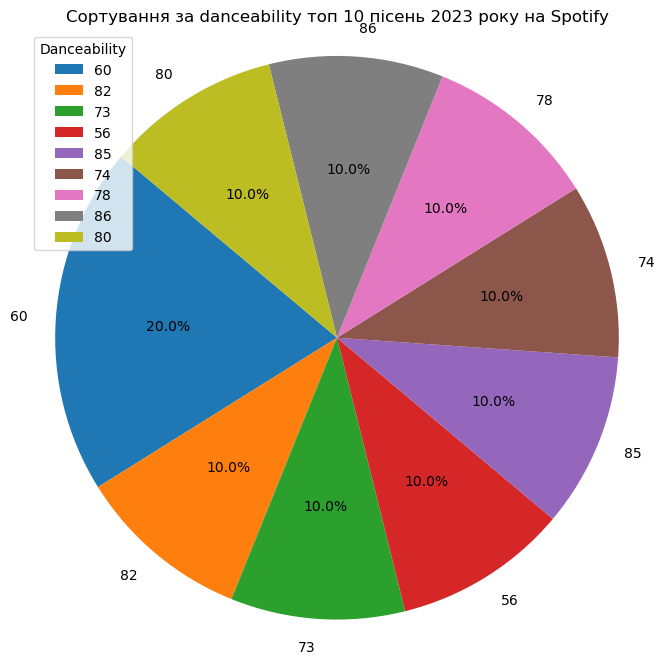

In [50]:
danceability = top_10_songs["danceability_%"].value_counts()

#Побудова кругової діаграми
plt.figure(figsize=(8,8))
plt.pie(danceability, labels=danceability.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title("Сортування за danceability топ 10 пісень 2023 року на Spotify")
#Додаємо легенду
plt.legend(title="Danceability", loc="best")
plt.show()

# Завдання № 3

Побудуйте лінійний графік, який відображає зміни кількості прослуховувань
певного треку протягом року 2023 року.


Ремарка: З даних видно, що у датасеті присутні дані лише за місяць релізу пісні. Це означає, що я не можу побудувати графік змін кількості прослуховувань треку протягом всього року 2023, оскільки немає даних за інші місяці.
Тому я побудую лінійний графік, який відображає зміни кількості прослуховувань найпопулярніших треків протягом 2023 року.

In [62]:
# Виділяємо необхідні стовпчики
selected_columns = ['track_name', 'streams', 'released_month'] 
songs_selected = songs_2023[selected_columns]

#Перші 5 рядків нового сету даних
songs_selected.loc[:, 'streams'] = songs_selected['streams'].astype(float)
print(songs_selected.head())
print(songs_selected.dtypes)

                            track_name      streams  released_month
0  Seven (feat. Latto) (Explicit Ver.)  141381703.0               7
1                                 LALA  133716286.0               3
2                              vampire  140003974.0               6
4                       WHERE SHE GOES  303236322.0               5
5                             Sprinter  183706234.0               6
track_name        object
streams           object
released_month     int64
dtype: object


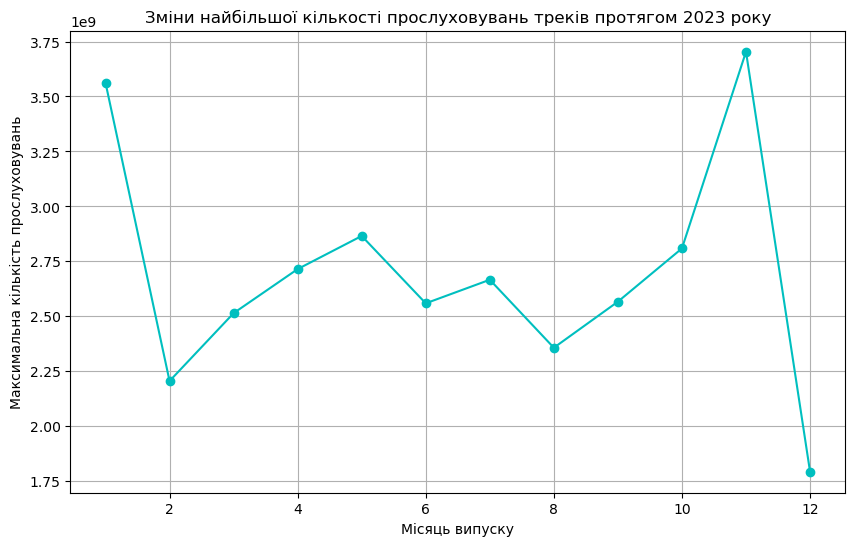

In [116]:
# Знаходимо трек з максимальними показниками для кожного місяця
max_streams_per_month = selected_columns_clean.groupby('released_month').apply(lambda x: x.loc[x.streams.idxmax()])
max_streams_per_month.reset_index(drop=True, inplace=True)

# Побудуємо графік даних
plt.figure(figsize=(10, 6))
plt.plot(max_streams_per_month['released_month'], max_streams_per_month['streams'], marker='o', linestyle='-', color='c')
plt.xlabel('Місяць випуску')
plt.ylabel('Максимальна кількість прослуховувань')
plt.title('Зміни найбільшої кількості прослуховувань треків протягом 2023 року')
plt.grid(True)
plt.show()

# Завдання № 4

Створіть стовпчикову діаграму, на якій відображаються 10 найпопулярніших
артистів на Spotify у 2023 році за кількістю слухачів..

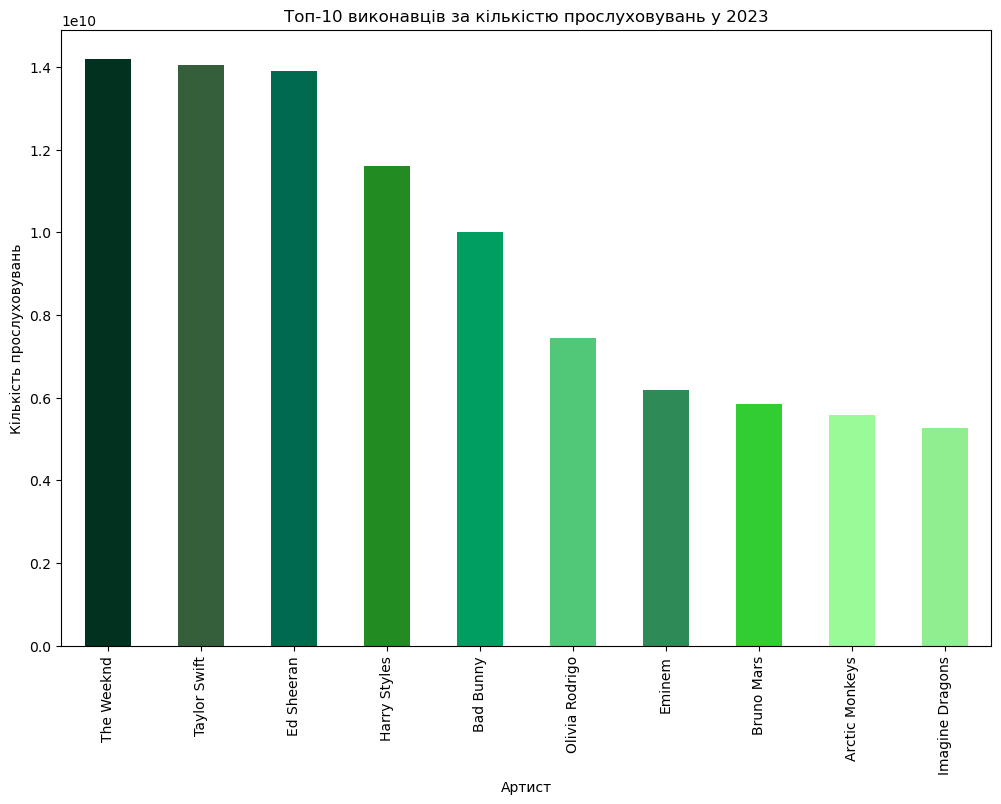

In [117]:
# Згруповуємо за ім'я виконавців з кількісю прослуховувань і отримаємо 10 найкращих виконавців
top_artists = data.groupby('artist(s)_name')['streams'].sum().nlargest(10)

#додаємо кольори щоб краще побачити різницю
colors = ['#013220', '#355E3B', '#006A4E', '#228B22', '#009E60', 
                '#50C878', '#2E8B57', '#32CD32', '#98FB98', '#90EE90']

# Будуємо діаграму
plt.figure(figsize=(12, 8))
top_artists.plot(kind='bar', color=colors)
plt.title('Топ-10 виконавців за кількістю прослуховувань у 2023')
plt.xlabel('Артист')
plt.ylabel('Кількість прослуховувань')
plt.show()


# Завдання № 5

Побудуйте горизонтальну стовпчикову діаграму, яка порівнює кількість
прослуховувань трьох конкретних треків у 2023 році.

In [120]:
import random
#Рандомно обираємо 3 пісні зі стовпця назви треку
random_songs = random.sample(list(songs_selected['track_name']), 3)

# Створюємо з отриманих треків новий датасет
dataset_random = songs_selected[songs_selected['track_name'].isin(random_songs)]
print(dataset_random)

                 track_name      streams  released_month
7                  Columbia   58149378.0               7
264                    I AM  123132751.0               4
299  People Pt.2 (feat. IU)   95816024.0               4


In [ ]:
#Будуємо діаграму
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.barh(dataset_random["track_name"], dataset_random["streams"], color='g')
plt.xlabel("Кількість прослуховувань")
plt.ylabel("Назвb пісень")
plt.title("Порівняння кількості прослуховувань трьох конкре треків у 2023 році.")
plt.gca().invert_yaxis()
plt.show()